In [41]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [42]:
df= pd.read_csv("mobile_price_classification.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,talk_time,three_g,touch_screen,wifi,price_range,screen_size,camera_quality,processor_power,memory_weight_ratio,network_type
0,842,0,2.2,0,1,0,7,0.6,188,2,...,19,0,0,1,1,11.401754,15120,4.4,0.037234,2
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,7,1,1,0,2,17.262677,0,1.5,0.389706,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,9,1,1,0,2,11.180340,4334616,2.5,0.282759,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,11,1,0,0,2,17.888544,0,15.0,0.076336,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,15,1,1,0,1,8.246211,19033248,2.4,0.312057,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,19,1,1,0,0,13.601471,0,3.0,0.018868,2
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,16,1,1,1,2,14.866069,0,10.4,0.208556,3
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,5,1,1,0,3,9.055385,1416576,7.2,0.333333,2
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,19,1,1,1,0,20.591260,900480,4.5,0.317241,4


In [43]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'screen_size', 'camera_quality',
       'processor_power', 'memory_weight_ratio', 'network_type'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   battery_power        2000 non-null   int64  
 1   blue                 2000 non-null   int64  
 2   clock_speed          2000 non-null   float64
 3   dual_sim             2000 non-null   int64  
 4   fc                   2000 non-null   int64  
 5   four_g               2000 non-null   int64  
 6   int_memory           2000 non-null   int64  
 7   m_dep                2000 non-null   float64
 8   mobile_wt            2000 non-null   int64  
 9   n_cores              2000 non-null   int64  
 10  pc                   2000 non-null   int64  
 11  px_height            2000 non-null   int64  
 12  px_width             2000 non-null   int64  
 13  ram                  2000 non-null   int64  
 14  sc_h                 2000 non-null   int64  
 15  sc_w                 2000 non-null   i

In [6]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,talk_time,three_g,touch_screen,wifi,price_range,screen_size,camera_quality,processor_power,memory_weight_ratio,network_type
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,11.011000,0.761500,0.503000,0.507000,1.500000,13.972457,3.856797e+06,6.870650,0.246115,2.297000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,5.463955,0.426273,0.500116,0.500076,1.118314,5.118891,6.515992e+06,5.393003,0.160857,1.290978
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000e+00,0.500000,0.010152,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,6.000000,1.000000,0.000000,0.000000,0.750000,9.486833,5.016450e+04,2.500000,0.113606,2.000000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,11.000000,1.000000,1.000000,1.000000,1.500000,14.212670,1.343603e+06,5.100000,0.225499,2.000000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,16.000000,1.000000,1.000000,1.000000,2.250000,17.888544,4.680714e+06,10.250000,0.347406,4.000000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,20.000000,1.000000,1.000000,1.000000,3.000000,26.172505,6.533276e+07,24.000000,0.771084,4.000000


<AxesSubplot:>

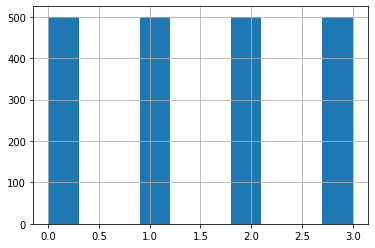

In [7]:
df['price_range'].hist()

In [8]:
d=df[['price_range','mobile_wt']].groupby('price_range').count()
d

,mobile_wt
price_range,
0,500
1,500
2,500
3,500


In [9]:
d=df[['price_range','pc']].groupby('price_range').count()
d

,pc
price_range,
0,500
1,500
2,500
3,500


In [44]:
X = df.drop("price_range",axis=1)
y =df['price_range']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
lr = LogisticRegression()

In [51]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
y_pred = lr.predict(X_test)

In [53]:
accuracy = accuracy_score(y_test, y_pred)

In [54]:
accuracy

0.4816666666666667

In [55]:
f1_score(Pred,y_test,average='weighted')

0.2744301639802665

#confusion matrix
confusion matrix is a table used to evaluate the performance of a classifier by comparing the predicted class labels to the true class labels of a set of test data. The confusion matrix is a square matrix with the same number of rows and columns as the number of classes in the problem.
in my exampl I have 4 ccategory that's why matix have for column and for ligne

In [56]:
cm = confusion_matrix(y_test, y_pred)

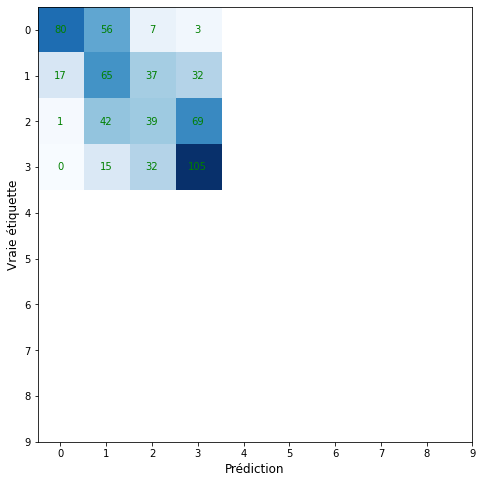

In [57]:
# Affichage de la matrice de confusion
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap='Blues')
ax.grid(False)
ax.set_xlabel('Prédiction', fontsize=12, color='black')
ax.set_ylabel('Vraie étiquette', fontsize=12, color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
for i in range(4):
    for j in range(4):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='GREEN')
plt.show()

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [60]:
Pred=DT.predict(X_test)

In [61]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.4816666666666667

In [62]:
f1_score(Pred,y_test,average='weighted')

0.8198968229998229

In [63]:
cm = confusion_matrix(y_test, y_pred)

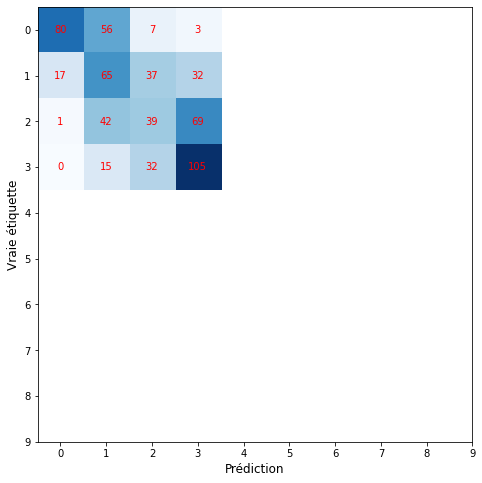

In [64]:
# Affichage de la matrice de confusion
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap='Blues')
ax.grid(False)
ax.set_xlabel('Prédiction', fontsize=12, color='black')
ax.set_ylabel('Vraie étiquette', fontsize=12, color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
for i in range(4):
    for j in range(4):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='RED')
plt.show()

In [13]:
# need a lot of time for train by fit
# so I don't use this algorithm "SVC"
svm = SVC(kernel='linear')

In [ ]:
svm.fit(X_train, y_train)

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Exactitude :', accuracy)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
# Affichage de la matrice de confusion
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap='Blues')
ax.grid(False)
ax.set_xlabel('Prédiction', fontsize=12, color='black')
ax.set_ylabel('Vraie étiquette', fontsize=12, color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()